In [ ]:
import pandas as pd
import numpy as np
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import ast

In [ ]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [ ]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

#### Data cleaning

In [ ]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


### Normalization dataset

In [ ]:
#Count how many grapes in the column grapes are unique grapes are in a array
grapes = df2['Grapes'].str.split(',').explode().unique()

#Remove every "]"" and "[" and "," and "'" and remove spaces if they are in the first character or the last character
grapes = [grape.replace(']', '').replace('[', '').replace(',', '').replace("'", '').strip() for grape in grapes]

grapes2 = ['Tempranillo', 'Chardonnay', 'Sauvignon Blanc', 'Pinot Noir', 'Glera', 'Chenin Blanc', 'Castelão ', 'Malagousia', 'Cinsault', 'Grenache', 'Shiraz', 'Cabernet Sauvignon', 'Bacchus', 'Viognier', 'Pinot Grigio', 'Garnacha', 'Malbec', 'Cortese', 'Merlot', 'Melon De Bourgogne', 'Carménère', 'Zinfandel', 'Syrah', 'Marsanne', 'Gruner Veltliner', 'Corvina', 'Greco', 'Macabeo', 'Gamay', 'Loureiro', 'Riesling', 'Alvarinho', 'Mourvèdre', 'Cabernet Franc', 'Vespaiola', 'Picpoul', 'Vermentino', 'Sangiovese', 'Pinot Meunier', 'Verdejo', 'Primitivo', 'Pinotage', 'Alicante Bouschet', 'Garganega', 'Godello', 'Carignan', 'Grenache Blanc', 'Aligoté', 'Siegerrebe', 'Touriga Nacional', 'Albarino', 'Nerello Mascalese', "Nero D'Avola", 'Turbiana', 'Pinot Gris', 'Airen', 'Trincadeira', 'Tinta Roriz', 'Xinomavro', 'Agiorgitiko', 'Pais', 'Gewürztraminer', 'Mencia', 'Verdicchio', 'Fiano', 'Rondinella', 'Mauzac', 'Nebbiolo', 'Lambrusco Grasparossa', 'Pecorino', 'Negroamaro', 'Fernão Pires', 'Feteasca Alba', 'Zwieigelt', 'Grillo', 'Tinta Barroca', 'Furmint', 'Touriga Franca', 'Pedro Ximénez', 'Palomino', 'Viura', 'Montepulciano', 'Barbera', 'Malvasia', 'Arinto', 'Colombard', 'Sémillon', 'Jacquere', 'Pinot Blanc', 'Rkatsiteli', 'Syrah-Shiraz', 'Torrontes', 'Sauvignon Gris', 'Assyrtiko', 'Moscato', 'Rolle', 'Huxelrebe', 'Xarel-Lo', 'Niellucciu', 'Saperavi', 'Rara Neagra', 'Non Varietal', 'Muscat', 'Monastrell', 'Dolcetto', 'Black Muscat', 'Nerello', 'Roussanne', 'Tibouren', 'Grolleau', 'Inzolia', 'Falanghina', 'Aglianico']

# Create a new array of grapes where both of the grapes match
grapes = list(set(grapes) & set(grapes2))
print(grapes)

df2['Grapes'] = df2['Grapes'].apply(lambda x: ast.literal_eval(x))

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: [grape for grape in x if grape in grapes]
)

# Drop rows where the resulting 'Grapes' column is empty
df2 = df2[df2['Grapes'].str.len() > 0]

df2['Grapes'] = df2['Grapes'].apply(
    lambda x: x[0]
)

# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)

#### Rest of the columns

In [ ]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity', 'Grapes'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity', 'Grapes'])

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Harmonize'])
encoded_df = encoded_df.dropna()
print(encoded_df.columns)
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

## Neural network

**imports and data preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# Ensure all columns are numeric
for col in encoded_df.columns:
    encoded_df[col] = pd.to_numeric(encoded_df[col], errors='coerce').fillna(0)

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
harmonize_mapping = {i: col.replace("Harmonize_", "") for i, col in enumerate(harmonize_columns)}
# Step 2: Feature and Target Preparation
type_columns = [col for col in encoded_df.columns if col.startswith('Type_')]
grape_columns = [col for col in encoded_df.columns if col.startswith('Grapes_')]

features = encoded_df[harmonize_columns]  # Targets are harmonize columns
labels = pd.DataFrame()

def label_training_model(label: list):
    global labels
    labels = encoded_df[label]

**The training model without hyper-parameters tuning for type wine:**

In [ ]:
# Step 0: choose the labels
label_training_model(type_columns) ## TYPE WINE

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 2: Neural Network Setup
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(units=y_train.shape[1], activation='sigmoid')  # No need for input_dim here
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize Training Progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**The training model without hyper-parameters tuning for grapes:**


In [ ]:
# Step 0: choose the labels
label_training_model(grape_columns) ## GRAPES

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 2: Neural Network Setup
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(units=y_train.shape[1], activation='sigmoid')  # No need for input_dim here
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize Training Progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**With hyper-parameter tuning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.backend import clear_session

# Step 1: choose the labels
label_training_model(type_columns)

# Step2: Enable eager execution to ensure compatibility with numpy() calls
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

def build_and_train_model(optimizer, batch_size, epochs):
    clear_session()  # Clear backend session to reset model state
    model = Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
        Dense(units=y_train.shape[1], activation='softmax')  # Single-layer with softmax
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Return accuracy and training history for later visualization
    return accuracy * 100, history

# Hyperparameter grid
batch_sizes = [32]
epochs_list = [10, 20]

def tune_optimizer(optimizer_class):
    global best_accuracy, best_params, history
    best_accuracy = 0
    best_params = {}

    for batch_size in batch_sizes:
        for epochs in epochs_list:
            optimizer = optimizer_class(learning_rate=0.001)  # Create a new optimizer instance
            print(f"Training with optimizer={optimizer.__class__.__name__}, batch_size={batch_size}, epochs={epochs}")
            accuracy, history = build_and_train_model(optimizer, batch_size, epochs)
            print(f"Accuracy: {accuracy:.2f}%")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'optimizer': optimizer.__class__.__name__,
                    'batch_size': batch_size,
                    'epochs': epochs
                }

    print("Best Hyperparameters for Optimizer:")
    print(f"Optimizer: {best_params['optimizer']}")
    print(f"Batch Size: {best_params['batch_size']}")
    print(f"Epochs: {best_params['epochs']}")
    print(f"Best Accuracy: {best_accuracy:.2f}%")

    # Visualize training progress for the best combination
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Best Accuracy - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Best Loss - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


print("Tuning for Adam optimizer:")
tune_optimizer(Adam)

print("Tuning for SGD optimizer:")
tune_optimizer(SGD)

print("Tuning for RMSprop optimizer:")
tune_optimizer(RMSprop)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Best Loss - Optimizer: {best_params["optimizer"]}, Batch Size: {best_params["batch_size"]}, Epochs: {best_params["epochs"]}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


### Classification Model Evaluation
**Predictions as classification for a single meal**

In [ ]:
# Function to predict the best grape for a given harmonize label
def predict_best_grape(harmonize_label, data_frame, neural_model):
    harmonize_col = f"Harmonize_{harmonize_label}"
    if harmonize_col not in data_frame.columns:
        return {"Error": f"Harmonize label '{harmonize_label}' not found in dataset."}

    # Create an input vector for the given harmonize label
    input_vector = pd.Series(0, index=data_frame.columns)  # Initialize all values to zero
    input_vector[harmonize_col] = 1  # Set the given harmonize column to 1

    # Select only relevant input features (harmonize columns)
    input_vector = input_vector[harmonize_columns].values.reshape(1, -1)  # Reshape for prediction

    # Predict using the trained model
    prediction = neural_model.predict(input_vector)

    # Get the best grape based on the highest prediction value
    predicted_grape_index = np.argmax(prediction[0])
    predicted_grape = grape_columns[predicted_grape_index].replace("Grapes_", "")

    return {"Harmonize": harmonize_label, "Best Grape": predicted_grape}

# Example usage
harmonize_label = "Meat"  # Replace with the desired harmonize label
result = predict_best_grape(harmonize_label, encoded_df, model)
print(f"Prediction for Harmonize '{harmonize_label}': Best Grape: {result['Best Grape']}")


In [10]:
# Function to predict the best wine type for a given harmonize label
def predict_best_wine(harmonize_label, data_frame, neural_model):
    harmonize_col = f"Harmonize_{harmonize_label}"
    if harmonize_col not in data_frame.columns:
        return {"Error": f"Harmonize label '{harmonize_label}' not found in dataset."}

    # Create an input vector for the given harmonize label
    input_vector = pd.Series(0, index=data_frame.columns)  # Initialize all values to zero
    input_vector[harmonize_col] = 1  # Set the given harmonize column to 1

    # Select only relevant input features (harmonize columns)
    input_vector = input_vector[harmonize_columns].values.reshape(1, -1)  # Reshape for prediction

    # Predict using the trained model
    prediction = neural_model.predict(input_vector)

    # Get the best wine type based on the highest prediction value
    predicted_wine_index = np.argmax(prediction[0])
    predicted_wine = type_columns[predicted_wine_index].replace("Type_", "")

    return {"Harmonize": harmonize_label, "Best Wine Type": predicted_wine}

# Example usage
harmonize_label = "Meat"  # Replace with the desired harmonize label
result = predict_best_wine(harmonize_label, encoded_df, model)
print(f"Prediction for Harmonize '{harmonize_label}': Best Wine Type: {result['Best Wine Type']}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction for Harmonize 'Meat': Best Wine Type: Red


### Measures

ROC Curve: Plots true positive rate vs. false positive rate.
AUC: Measures the ability of the model to distinguish between classes.

1392/1392 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step


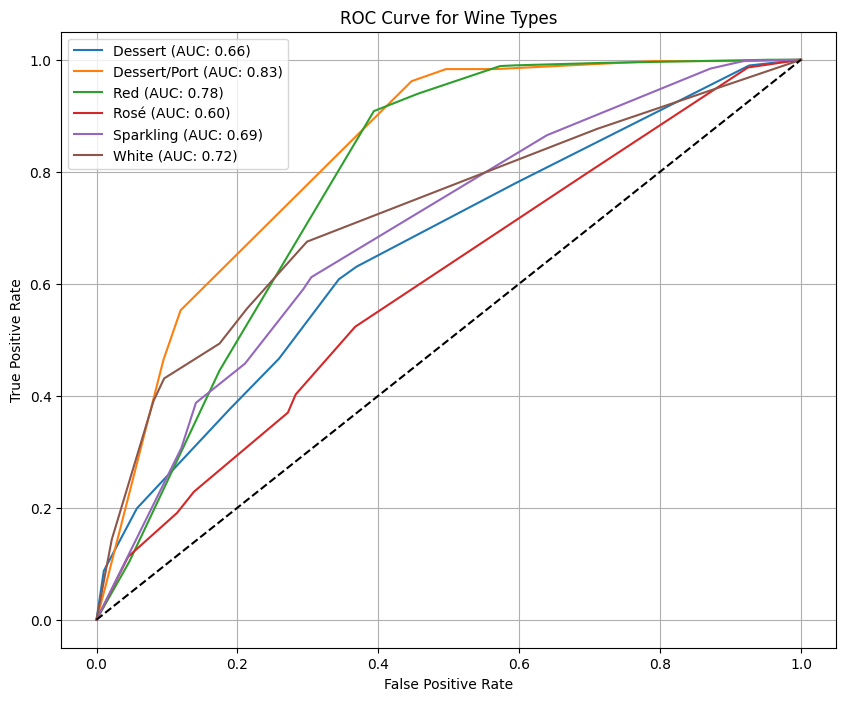

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
predictions = model.predict(X_test)

# Determine whether the model is trained for grapes or wine types
if labels.equals(encoded_df[grape_columns]):
    target_columns = grape_columns
    title = 'ROC Curve for Grapes'
elif labels.equals(encoded_df[type_columns]):
    target_columns = type_columns
    title = 'ROC Curve for Wine Types'
else:
    raise ValueError("Unknown label set. Ensure labels are either grape_columns or type_columns.")

# Calculate and plot ROC-AUC for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(target_columns):
    # Check if the class has more than one unique value to avoid errors
    if len(np.unique(y_test[class_name].values)) > 1:
        fpr, tpr, _ = roc_curve(y_test[class_name].values, predictions[:, i])
        auc_score = roc_auc_score(y_test[class_name].values, predictions[:, i])
        plt.plot(fpr, tpr, label=f'{class_name.replace("Type_", "").replace("Grapes_", "")} (AUC: {auc_score:.2f})')
    else:
        print(f"Skipping ROC-AUC for class '{class_name}' due to lack of variation in y_test.")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.title(title)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix
Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

1392/1392 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


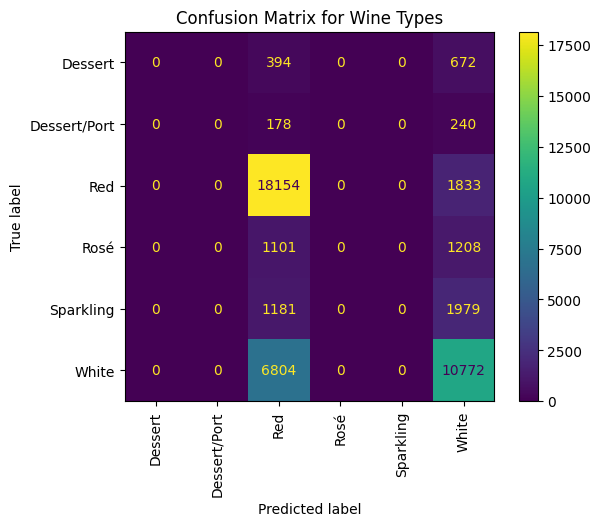

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure the labels (columns) are correctly identified
if labels.equals(encoded_df[grape_columns]):
    target_columns = grape_columns
    title = "Confusion Matrix for Grapes"
elif labels.equals(encoded_df[type_columns]):
    target_columns = type_columns
    title = "Confusion Matrix for Wine Types"
else:
    raise ValueError("Unknown label set. Ensure labels are either grape_columns or type_columns.")

# Generate confusion matrix
y_true_classes = np.argmax(y_test.values, axis=1)
predicted_classes = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_true_classes, predicted_classes)

# Extract the actual class labels for display
unique_labels = sorted(np.unique(np.concatenate((y_true_classes, predicted_classes))))
display_labels = [target_columns[i].replace("Grapes_", "").replace("Type_", "") for i in unique_labels]

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title(title)
plt.show()


In [13]:
from scipy.stats import binomtest

# Convert predictions to binary classes using a threshold of 0.5
predicted_classes = (model.predict(X_test) > 0.5).astype(int)

# Calculate the number of correct predictions (element-wise comparison)
correct_predictions = np.sum((predicted_classes == y_test.values).all(axis=1))
total_predictions = y_test.shape[0]

# Baseline random accuracy (assumes equal probability for each class)
if labels.equals(encoded_df[grape_columns]):
    task_name = "Grapes"
    random_accuracy = (1 / 2) ** len(grape_columns)
elif labels.equals(encoded_df[type_columns]):
    task_name = "Wine Types"
    random_accuracy = (1 / 2) ** len(type_columns)
else:
    raise ValueError("Unknown label set. Ensure labels are either grape_columns or type_columns.")

# Perform the binomial test
binom_test_result = binomtest(correct_predictions, total_predictions, random_accuracy)
p_value = binom_test_result.pvalue

# Output the result
print(f"Model Accuracy for {task_name}: {correct_predictions / total_predictions:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print(f"Model predictions for {task_name} are significantly better than random guessing.")
else:
    print(f"Model predictions for {task_name} are not significantly better than random guessing.")


1392/1392 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step
Model Accuracy for Wine Types: 0.0623, P-Value: 0.0000
Model predictions for Wine Types are significantly better than random guessing.
